In [1]:
from fastai import *
from fastai.vision import *
import  matplotlib.pyplot as plt
from PIL import Image
import os 

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
image_path = Path('.')/'images'

In [4]:
image_path.ls()

[PosixPath('images/cloudy32.jpg'),
 PosixPath('images/shine209.jpg'),
 PosixPath('images/shine146.jpg'),
 PosixPath('images/sunrise282.jpg'),
 PosixPath('images/sunrise128.jpg'),
 PosixPath('images/rain97.jpg'),
 PosixPath('images/rain56.jpg'),
 PosixPath('images/shine62.jpg'),
 PosixPath('images/cloudy115.jpg'),
 PosixPath('images/rain196.jpg'),
 PosixPath('images/cloudy21.jpg'),
 PosixPath('images/cloudy25.jpg'),
 PosixPath('images/sunrise59.jpg'),
 PosixPath('images/shine171.jpg'),
 PosixPath('images/shine159.jpg'),
 PosixPath('images/rain66.jpg'),
 PosixPath('images/shine28.jpg'),
 PosixPath('images/sunrise313.jpg'),
 PosixPath('images/sunrise277.jpg'),
 PosixPath('images/rain158.jpg'),
 PosixPath('images/sunrise76.jpg'),
 PosixPath('images/rain145.jpg'),
 PosixPath('images/rain76.jpg'),
 PosixPath('images/sunrise347.jpg'),
 PosixPath('images/cloudy159.jpg'),
 PosixPath('images/rain87.jpg'),
 PosixPath('images/cloudy191.jpg'),
 PosixPath('images/rain60.jpg'),
 PosixPath('images/rai

In [5]:
fnames = get_image_files(image_path)
fnames[:5]

[PosixPath('images/cloudy32.jpg'),
 PosixPath('images/shine209.jpg'),
 PosixPath('images/shine146.jpg'),
 PosixPath('images/sunrise282.jpg'),
 PosixPath('images/sunrise128.jpg')]

In [6]:
np.random.seed(2)
pat = r'/([^/0-9]+)\d+.(jpg|jpeg)$'

In [7]:
data = ImageDataBunch.from_name_re(image_path, fnames, pat, ds_tfms=get_transforms(), size=244, bs=4)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (900 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
shine,shine,sunrise,sunrise,rain
Path: images;

Valid: LabelList (225 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
cloudy,shine,sunrise,rain,shine
Path: images;

Test: None

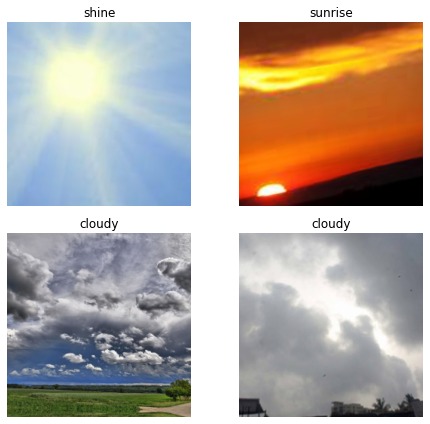

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
print(data.classes)
data.c,len(data.classes)

['cloudy', 'rain', 'shine', 'sunrise']


(4, 4)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy_thresh, error_rate], callback_fns=[ShowGraph])

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


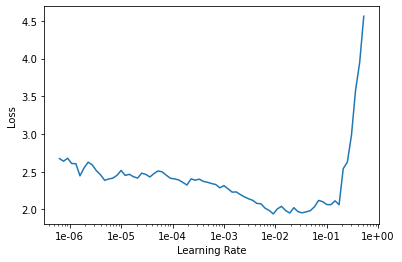

In [13]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time
0,1.238653,1.269661,0.258889,0.386667,00:08
1,1.658811,0.543496,0.240000,0.151111,00:08
2,1.643838,0.593085,0.234444,0.195556,00:08
3,1.064837,0.252935,0.246667,0.102222,00:08
4,0.888042,0.166406,0.260000,0.053333,00:08


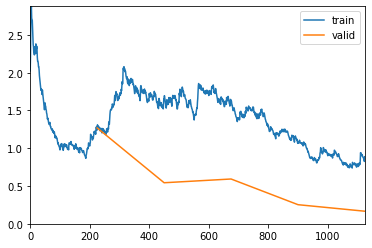

In [14]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time
0,0.718840,0.180024,0.255556,0.062222,00:08
1,0.812772,0.183173,0.251111,0.053333,00:08
2,0.617058,0.164033,0.233333,0.031111,00:08
3,0.675357,0.117594,0.245556,0.022222,00:08
4,0.556962,0.145004,0.251111,0.053333,00:08


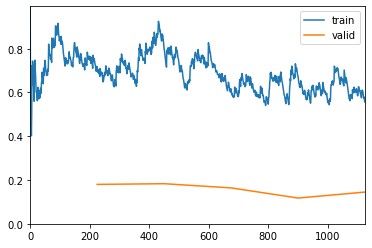

In [15]:
learn.fit_one_cycle(5, 1e-3)

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy_thresh, error_rate], callback_fns=[ShowGraph])

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time
0,0.903157,0.343540,0.251111,0.111111,00:08
1,0.772135,0.299396,0.240000,0.088889,00:08
2,0.709132,0.259282,0.252222,0.093333,00:08
3,0.800829,0.253342,0.238889,0.093333,00:08


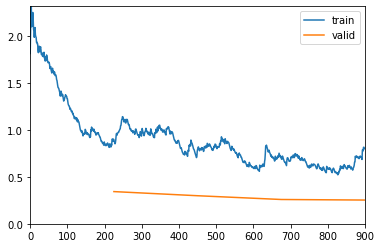

In [17]:
learn.fit_one_cycle(4)

In [21]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy_thresh, error_rate], callback_fns=[ShowGraph])

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time
0,0.983073,0.376019,0.250000,0.111111,00:13
1,0.942092,0.209468,0.251111,0.053333,00:13
2,0.601504,0.146094,0.255556,0.031111,00:13
3,0.455112,0.111877,0.250000,0.035556,00:13


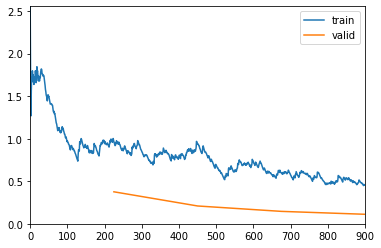

In [22]:
learn.fit_one_cycle(4)

In [18]:
learn.save('stage-1')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

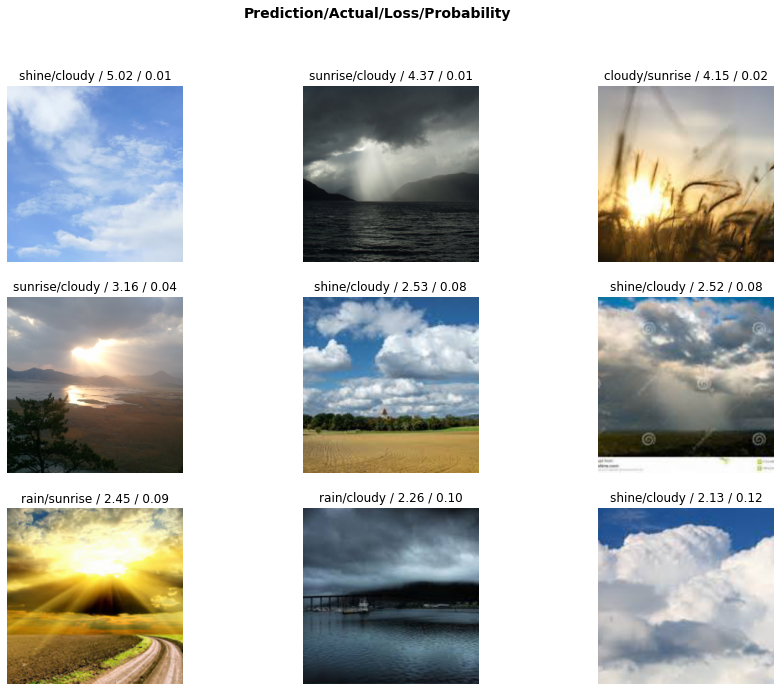

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

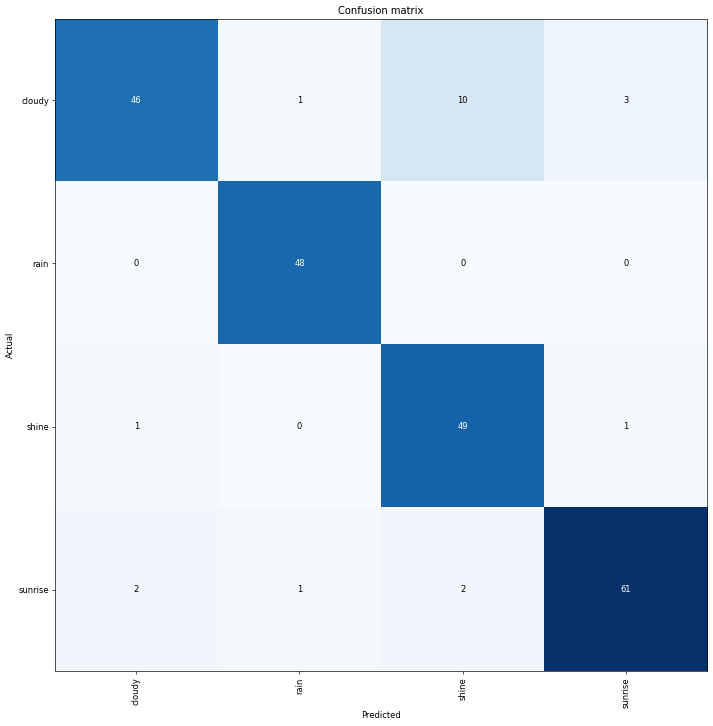

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('cloudy', 'shine', 10),
 ('cloudy', 'sunrise', 3),
 ('sunrise', 'cloudy', 2),
 ('sunrise', 'shine', 2)]

In [23]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


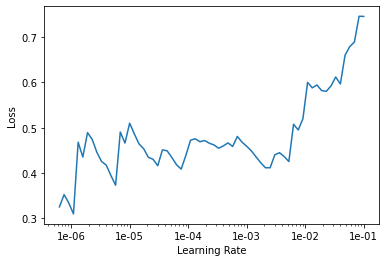

In [24]:
learn.recorder.plot()

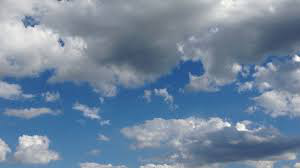

In [33]:
img = open_image("images/cloudy25.jpg")
img

In [34]:
pred_class,pred_idx,outputs = learn.predict(img)

In [35]:
pred_class.obj

'cloudy'

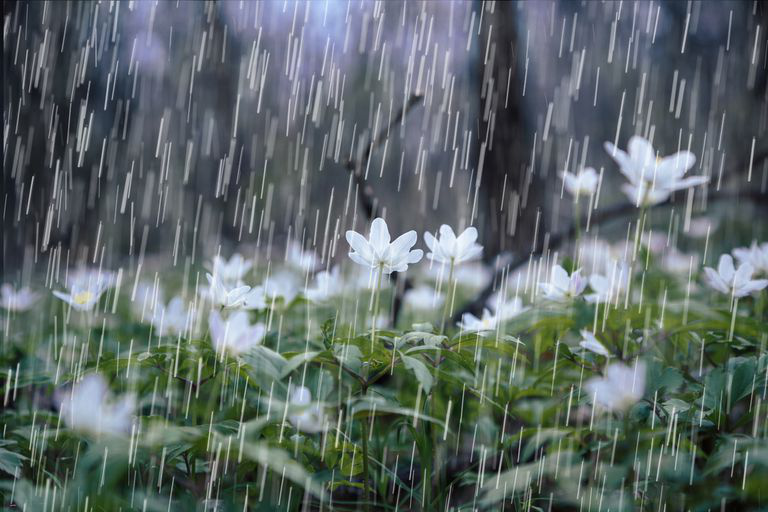

In [36]:
img = open_image("test/rain.jpg")
img

In [37]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'rain'

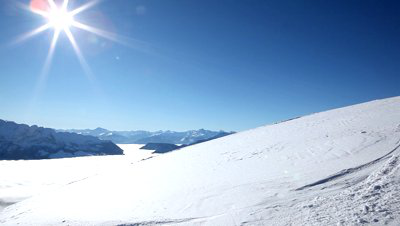

In [40]:
img = open_image("images/shine28.jpg")
img

In [41]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'shine'

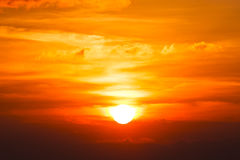

In [42]:
img = open_image("images/sunrise64.jpg")
img

In [47]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'sunrise'

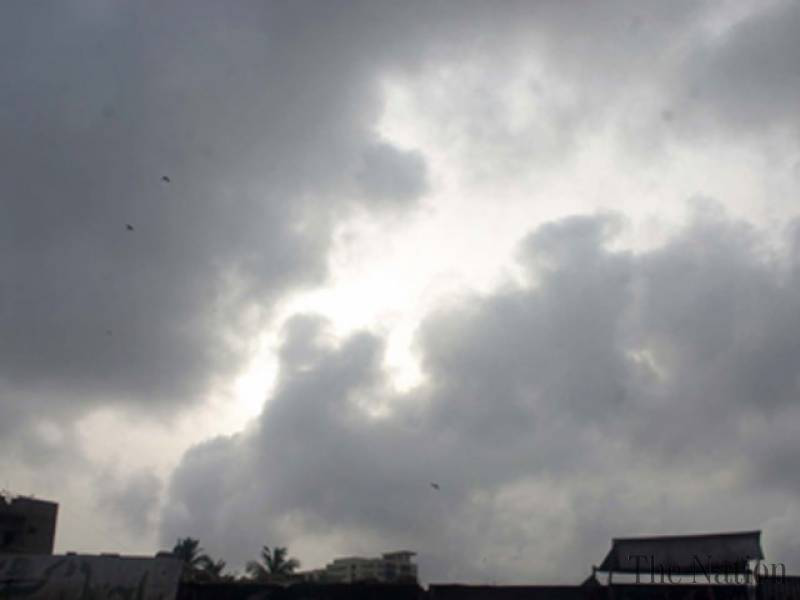

In [49]:
img = open_image("images/cloudy4.jpg")
img

In [50]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'cloudy'